In [1]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.pipeline import make_pipeline

# Train Test Split
from sklearn.model_selection import train_test_split

# Menyatukan beberapa tahap Preprocessing atau fungsi lainnya
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Encoder dan Scaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler,RobustScaler
import category_encoders as ce

# Cross Validation untuk menentukan Algoritma Terbaik
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, StratifiedKFold

# Metrics untuk Klasifikasi
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, make_scorer, fbeta_score, recall_score, precision_score, average_precision_score, precision_recall_curve, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, fbeta_score

# IMB Pipeline
from imblearn.pipeline import Pipeline

# Model Selection
from sklearn.model_selection import cross_validate, StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
f2_score = make_scorer(fbeta_score, beta=2)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier


# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('transaksi_ppatk_202312.csv')
df

,NO_REFERENSI,TANGGAL_TRANSAKSI,KODE_CABANG,NAMA_CABANG,STATUS_D_C,NO_REKENING,NAMA_REKENING,JALAN,RT_RW,KELURAHAN,KECAMATAN,KOTA_KABUPATEN,KODE_POS,NOMOR_HANDPHONE,JENIS_PEKERJAAN,STATUS_PEP_PENGIRIM,NOMINAL,TRN_CODE,KURS,DESCRIPTION,BANK_LAWAN,REKENING_LAWAN,NAMA_LAWAN,CUSTOMERID,TANGGAL_PEMBUKAAN,STATUS_REKENING,JENIS_MATA_UANG,PROPINSI,NEGARA,JENIS_KELAMIN,TEMPAT_LAHIR,TANGGAL_LAHIR,NIK,NEGARA_DOMISILI,PEKERJAAN,SUMBERDANA
0,000CBBF23335C1A7,2023-12-01 18:45:55.000,373,KCP PANGKAL PINANG - SUNGAILIAT,C,3730005635,YESSI NURLETA,JL. DEPATI BAHRIN DUSUN 02,000/000,KIMAK,MERAWANG,BANGKA,33172,6281367103770,TOKO BAJU,NO,200000.0,446,IDR,CDT TRF BENFC BIFAST 3609101403730005635 CENA...,CENAIDJA,1.180508e+09,HERI SUYIT,3933270,2014-11-17,O,IDR,KEP. BANGKA BELITUNG,ID,F,PELANG KENIDAI,1974-11-30,1901037011740002,ID,MENGURUS RUMAH TANGGA,GAJI/TABUNGAN PRIBADI
1,000DCTM23335A41H,2023-12-01 12:59:51.000,139,KCP CIREBON - SUMBER,C,1390004046,SULAIMAN HAKIM,BLOK DUAN SUKUN,005/002,BODE LOR,PLUMBON,KAB. CIREBON,45155,85314462336,MI AL WASHLIYAH PERBUTULAN,NO,100000.0,370,IDR,INTERNAL TRANSFER MOBILE BANKING 6019231390014...,147,1.390014e+09,AHMAD SUBHAN,4119391,2015-12-21,O,IDR,JAWA BARAT,ID,M,CIREBON,1986-06-29,3209182906860012,ID,GURU,GAJI/TABUNGAN PRIBADI
2,139CHWA233350032,2023-12-01 11:37:09.000,139,KCP CIREBON - SUMBER,D,1390004046,SULAIMAN HAKIM,BLOK DUAN SUKUN,005/002,BODE LOR,PLUMBON,KAB. CIREBON,45155,85314462336,MI AL WASHLIYAH PERBUTULAN,NO,500000.0,210,IDR,CWATM MUAMALAT 6019234007650402 01635 333501...,147,1.390004e+09,SULAIMAN HAKIM,4119391,2015-12-21,O,IDR,JAWA BARAT,ID,M,CIREBON,1986-06-29,3209182906860012,ID,GURU,GAJI/TABUNGAN PRIBADI
3,000ISKN233350434,2023-12-01 12:48:59.000,308,KCU SERANG,C,4650000551,IDA LAELA,LINK. BARU I,003/004,LEBAKGEDE,PULOMERAK,KOTA CILEGON,42431,81808173177,SD MADANI,NO,1527100.0,410,IDR,SKN IN CR 1471474650000551 147147 0112232031...,PT. BANK PEMBANGUNAN DAERAH BANTEN,8.800900e+08,RAB TRANSFER,3344193,2013-05-16,O,IDR,BANTEN,ID,F,SERANG,1987-07-07,3604324707870003,ID,MENGURUS RUMAH TANGGA,GAJI/TABUNGAN PRIBADI
4,000CWFB233351660,2023-12-01 15:27:37.000,308,KCU SERANG,D,4650000551,IDA LAELA,LINK. BARU I,003/004,LEBAKGEDE,PULOMERAK,KOTA CILEGON,42431,81808173177,SD MADANI,NO,200000.0,240,IDR,CWATM BERSAMA 6019234007731806 0000B646 0000...,147,4.650001e+09,IDA LAELA,3344193,2013-05-16,O,IDR,BANTEN,ID,F,SERANG,1987-07-07,3604324707870003,ID,MENGURUS RUMAH TANGGA,GAJI/TABUNGAN PRIBADI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,000CBBF233351992,2023-12-01 05:20:57.000,723,KCP MATARAM - LANGKO,C,7230008017,"SRI MARYANI, SE.",DUSUN BAT PAWANG,001/001,SESAIT,KAYANGAN,LOMBOK UTARA,83353,6287754134347,IRT,NO,50000.0,446,IDR,CDT TRF BENFC BIFAST 3609245107230008017 BSMD...,BSMDIDJA,7.135719e+09,LENI SURAN,4671183,2017-10-24,O,IDR,NUSA TENGGARA BARAT,ID,F,MATARAM,1990-03-04,5271054303900002,ID,MENGURUS RUMAH TANGGA,GAJI/TABUNGAN PRIBADI
1139,000CBBF23335B5U5,2023-12-01 16:47:08.000,531,KCU YOGYAKARTA,C,5310083230,NANA WAHYU KENCANA,TEGALAN V,003/011,SIDOMOYO,GODEAN,KAB. SLEMAN,55264,6281328032166,PT FORMULA LALU LINTAS,NO,2660000.0,446,IDR,CDT TRF BENFC BIFAST 3609245105310083230 BSMD...,BSMDIDJA,7.232341e+09,SRI RAHAYU,4739613,2022-12-07,O,IDR,DAERAH ISTIMEWA YOGYAKARTA,ID,M,SLEMAN,1993-10-07,3404020710930001,ID,WIRASWASTA,GAJI/TABUNGAN PRIBADI
1140,000DABA23335A1S1,2023-12-01 21:27:13.000,717,KK MALANG - BATU,D,7170006698,BAMBANG PRAHMONO,JL DEWI SARTIKA 3 H B 10,001/010,TEMAS,BATU,KOTA BATU,65314,6285100339632,KANTOR NOTARIS,NO,150000.0,440,IDR,DBT TRF BERSAMA 6019237170006698 BMIDIN01 00...,019,4.683109e+09,UMI HANIK MACHF,5332420,2020-10-12,O,IDR,JAWA TIMUR,ID,M,BLITAR,1975-04-13,3579011304750002,ID,KARYAWAN SWASTA,GAJI/TABUNGAN PRIBADI
1141,307DCTI233350002,2023-12-01 13:53:55.000,161,KCU SUKABUMI,C,1610044577,"MUSWANDI, S.AG",KP. CIRENIK,001/005,KARANGPAPAK,CISOLOK,KAB. SUKABUMI,43366,628

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NO_REFERENSI         1143 non-null   object 
 1   TANGGAL_TRANSAKSI    1143 non-null   object 
 2   KODE_CABANG          1143 non-null   int64  
 3   NAMA_CABANG          1143 non-null   object 
 4   STATUS_D_C           1143 non-null   object 
 5   NO_REKENING          1143 non-null   int64  
 6   NAMA_REKENING        1143 non-null   object 
 7   JALAN                1143 non-null   object 
 8   RT_RW                1143 non-null   object 
 9   KELURAHAN            1143 non-null   object 
 10  KECAMATAN            1143 non-null   object 
 11  KOTA_KABUPATEN       1143 non-null   object 
 12  KODE_POS             1143 non-null   int64  
 13  NOMOR_HANDPHONE      1143 non-null   int64  
 14  JENIS_PEKERJAAN      1108 non-null   object 
 15  STATUS_PEP_PENGIRIM  1143 non-null   o

<Axes: >

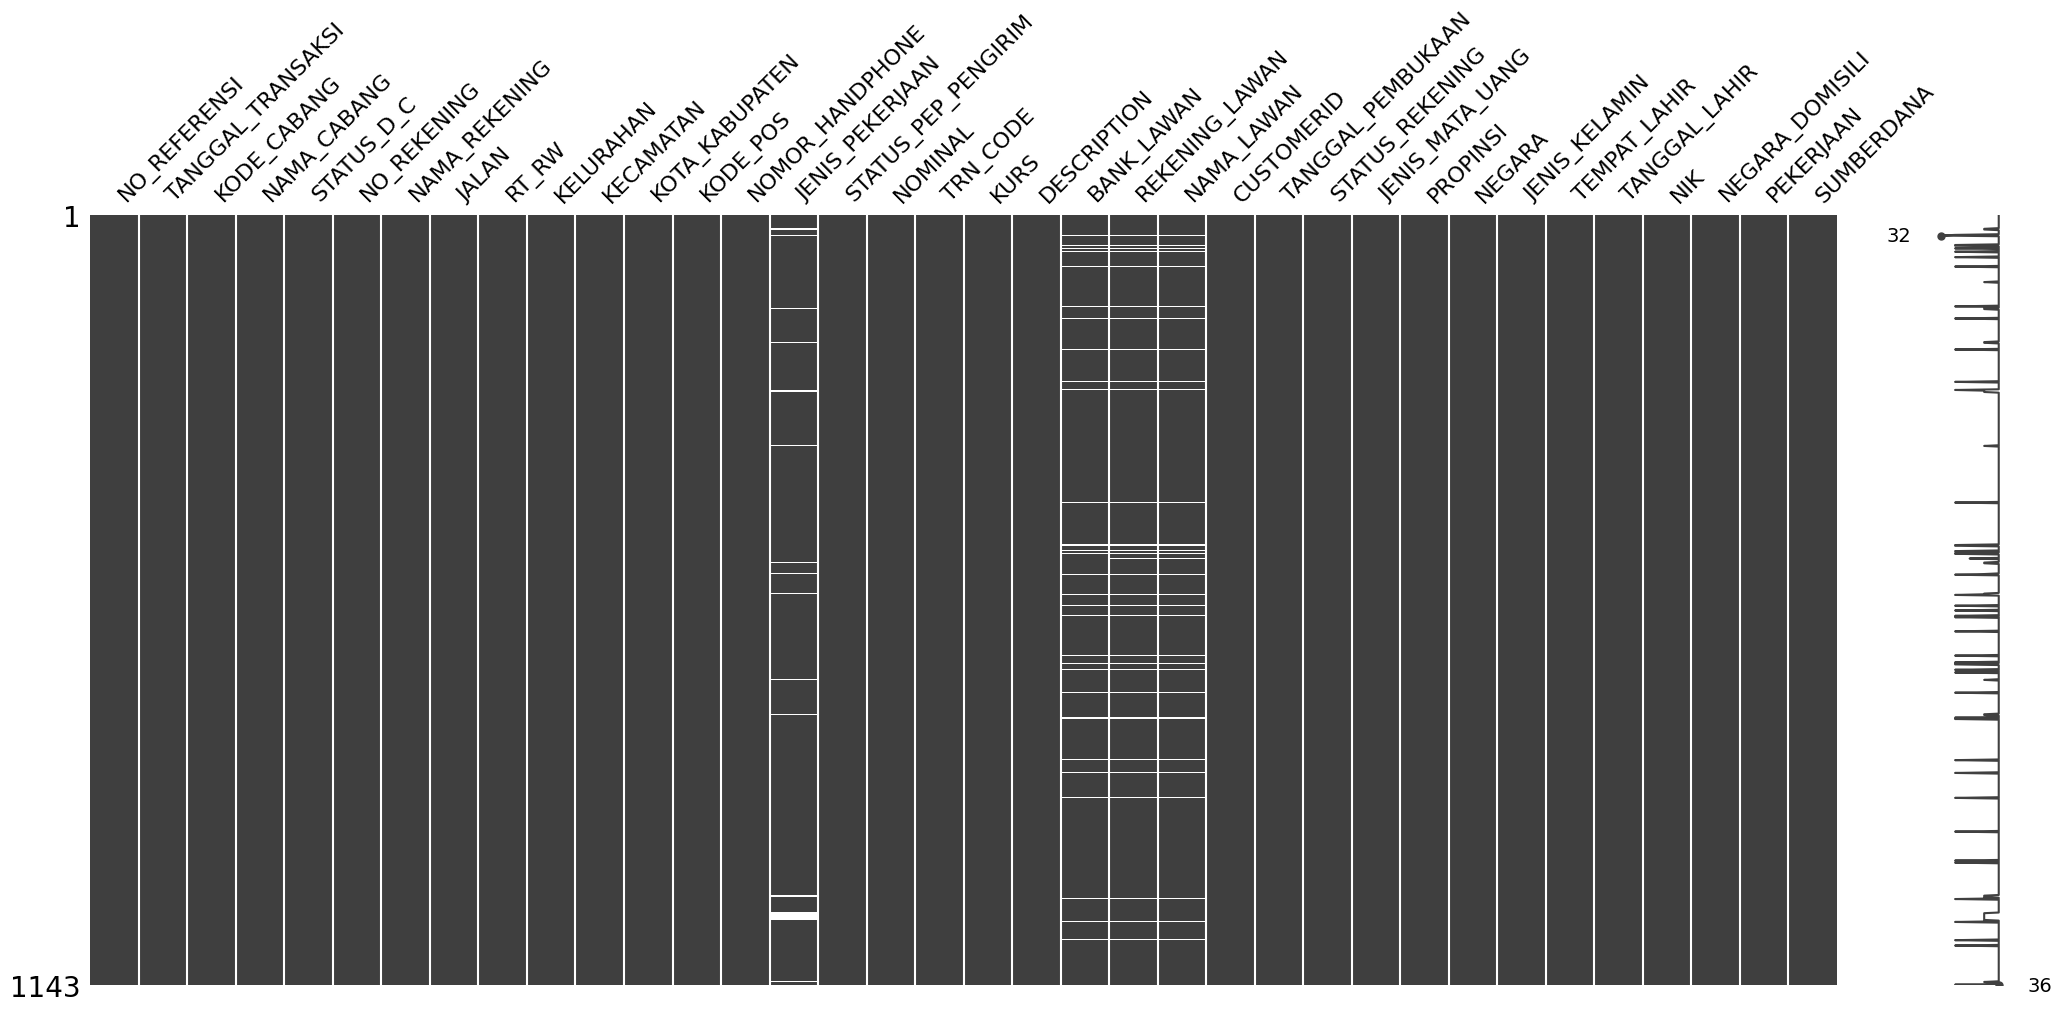

In [4]:
missingno.matrix(df)

Di bawah ini kita memplot Heatmap yang menunjukkan korelasi nulitas antara berbagai kolom yang memiliki data yang hilang pada dataset kita.

Korelasi nulitas berkisar dari -1 hingga 1.

- -1 - Korelasi Negatif yang menyatakan bahwa jika nilai satu variabel ada maka nilai variabel lain pasti tidak ada.
- 0 - Tidak ada korelasi yang menyatakan bahwa nilai variabel yang ada atau tidak ada tidak berpengaruh satu sama lain.
- 1 - Korelasi Positif yang menyatakan bahwa jika nilai satu variabel ada maka nilai yang lain pasti ada

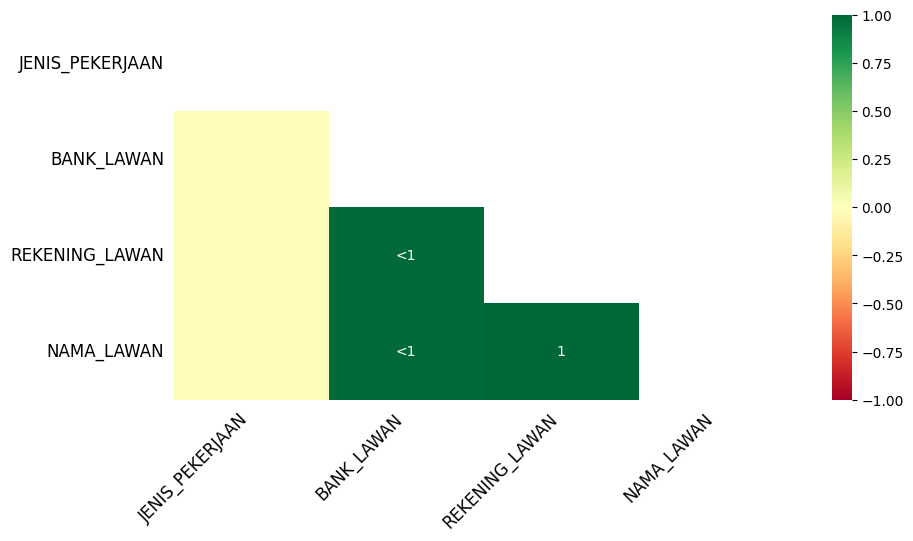

In [5]:

missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12);

#### Tabel deksripsi dataset:

In [6]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(1).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,NO_REFERENSI,object,0,0.00,1109,[891DABA233350003]
1,TANGGAL_TRANSAKSI,object,0,0.00,1100,[2023-12-01 07:21:15.000]
2,KODE_CABANG,int64,0,0.00,189,[474]
3,NAMA_CABANG,object,0,0.00,189,[KK PEKANBARU - PANAM]
4,STATUS_D_C,object,0,0.00,2,[D]
5,NO_REKENING,int64,0,0.00,549,[8040015164]
6,NAMA_REKENING,object,0,0.00,530,[AFNI USMAN]
7,JALAN,object,0,0.00,508,[JL.KARANGKAJEN 80 YOGYAKARTA]
8,RT_RW,object,0,0.00,174,[005/001]
9,KELURAHAN,object,0,0.00,460,[CIMACAN]


In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1062 entries, 0 to 1142
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NO_REFERENSI         1062 non-null   object 
 1   TANGGAL_TRANSAKSI    1062 non-null   object 
 2   KODE_CABANG          1062 non-null   int64  
 3   NAMA_CABANG          1062 non-null   object 
 4   STATUS_D_C           1062 non-null   object 
 5   NO_REKENING          1062 non-null   int64  
 6   NAMA_REKENING        1062 non-null   object 
 7   JALAN                1062 non-null   object 
 8   RT_RW                1062 non-null   object 
 9   KELURAHAN            1062 non-null   object 
 10  KECAMATAN            1062 non-null   object 
 11  KOTA_KABUPATEN       1062 non-null   object 
 12  KODE_POS             1062 non-null   int64  
 13  NOMOR_HANDPHONE      1062 non-null   int64  
 14  JENIS_PEKERJAAN      1062 non-null   object 
 15  STATUS_PEP_PENGIRIM  1062 non-null   object

In [8]:
# Hitung jumlah nilai unik dalam setiap kolom
unique_counts = df.nunique()

# Filter baris yang memiliki lebih dari 1 nilai unik dalam kolom
filter_condition = (unique_counts > 1)
df = df[df.columns[filter_condition]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1062 entries, 0 to 1142
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NO_REFERENSI         1062 non-null   object 
 1   TANGGAL_TRANSAKSI    1062 non-null   object 
 2   KODE_CABANG          1062 non-null   int64  
 3   NAMA_CABANG          1062 non-null   object 
 4   STATUS_D_C           1062 non-null   object 
 5   NO_REKENING          1062 non-null   int64  
 6   NAMA_REKENING        1062 non-null   object 
 7   JALAN                1062 non-null   object 
 8   RT_RW                1062 non-null   object 
 9   KELURAHAN            1062 non-null   object 
 10  KECAMATAN            1062 non-null   object 
 11  KOTA_KABUPATEN       1062 non-null   object 
 12  KODE_POS             1062 non-null   int64  
 13  NOMOR_HANDPHONE      1062 non-null   int64  
 14  JENIS_PEKERJAAN      1062 non-null   object 
 15  STATUS_PEP_PENGIRIM  1062 non-null   object

### Jumlah Nominal PPATK by Name

In [9]:
nama = df.groupby('NAMA_REKENING')['NOMINAL'].sum().reset_index().sort_values(by='NOMINAL', ascending=False)
nama

,NAMA_REKENING,NOMINAL
32,AMAN,150000000.0
327,RAMLI,147000000.0
191,"ISMAIL HARUN SANJAYA,S.T",134000000.0
426,SYAFRIZON,125000000.0
465,WIDIA WARDANI SE MSI,100000000.0
...,...,...
145,HAMDANI,45000.0
81,DIAN PAHLEVI,25000.0
495,ZULKARNAIN ILYAS IDRIS,25000.0
218,KUSNAWATI,10106.0


<Axes: >

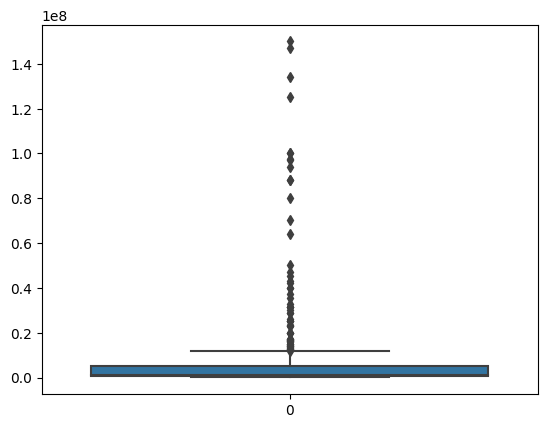

In [10]:
sns.boxplot(nama['NOMINAL'])

#### Jumlah Nominal PPATK berdasarkan wilayah

In [11]:
region = df.groupby('PROPINSI')['NOMINAL'].sum().reset_index().sort_values(by='NOMINAL', ascending=False)
region

,PROPINSI,NOMINAL
45,SUMATERA UTARA,350483000.0
12,JAWA BARAT,280378265.0
31,P A P U A,273752187.0
39,SULAWESI TENGGARA,252514828.0
18,KALIMANTAN TIMUR,248931502.0
43,SUMATERA BARAT,227340399.0
13,JAWA TENGAH,204818162.0
24,LAMPUNG,190884000.0
23,KEPULAUAN RIAU,171086360.0
8,DKI JAKARTA,159026062.0


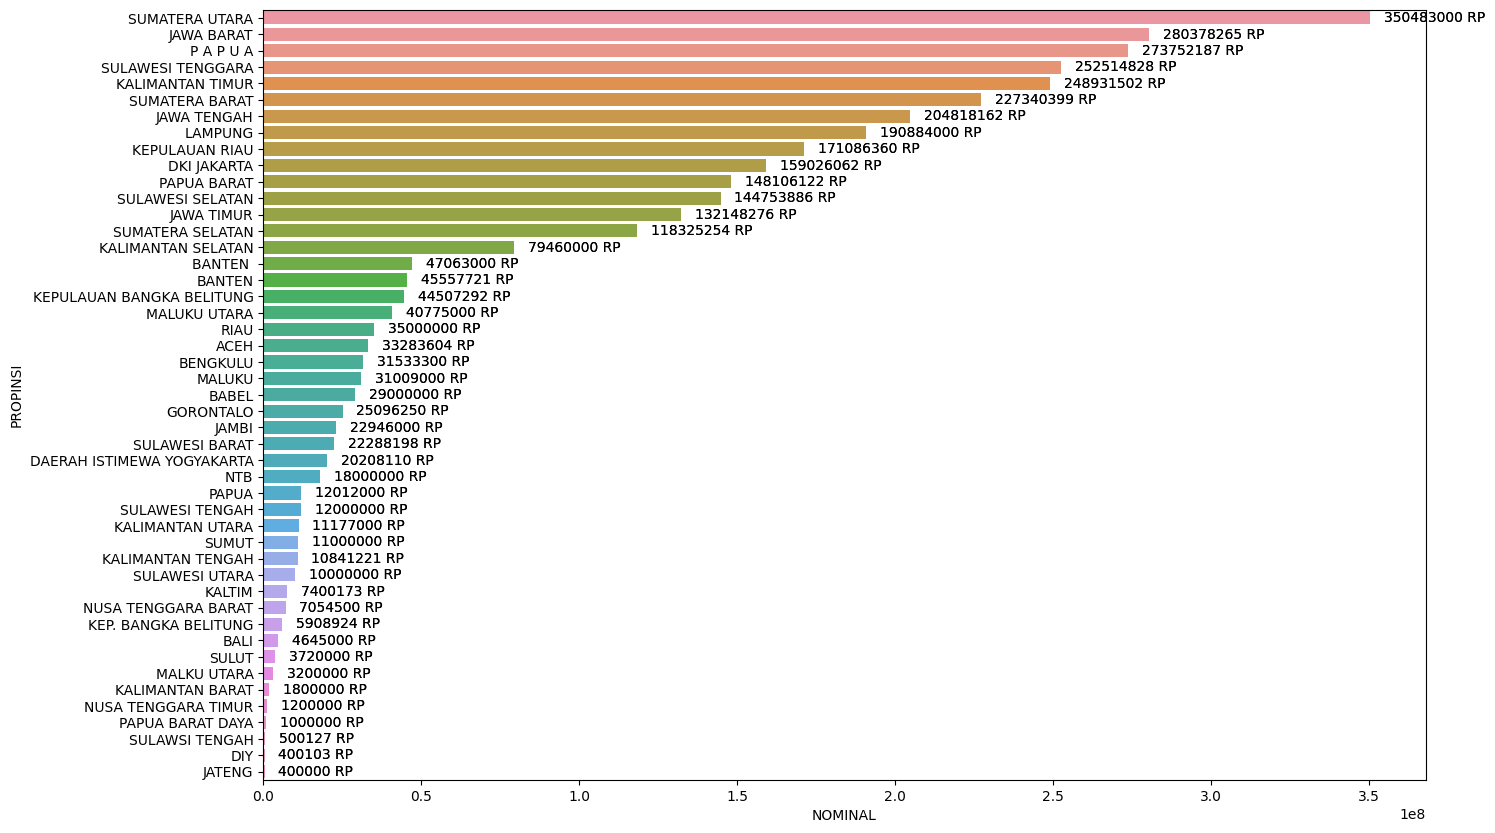

In [12]:
plt.figure(figsize=(15,10))
sns.barplot(data=region, x='NOMINAL', y='PROPINSI')
ax = sns.barplot(data= region,x='NOMINAL', y='PROPINSI')
for p in ax.patches:
    ax.annotate("%.0f RP" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(10, 0), textcoords='offset points', ha="left", va="center", color = 'black')


#### Frekuensi Terjadinya PPATK by Region

In [13]:
region_count = df['PROPINSI'].value_counts().reset_index().rename(columns={'count':'jumlah'})
region_count

,PROPINSI,jumlah
0,JAWA BARAT,140
1,SULAWESI TENGGARA,71
2,JAWA TENGAH,61
3,KALIMANTAN TIMUR,60
4,JAWA TIMUR,60
5,KEPULAUAN BANGKA BELITUNG,53
6,PAPUA BARAT,48
7,SUMATERA SELATAN,47
8,SUMATERA UTARA,43
9,SULAWESI SELATAN,43


In [14]:
import folium
from folium.plugins import HeatMap
import plotly.express as px


In [43]:
import folium

geojson_file = 'indonesia-prov.geojson'

# Membuat peta Folium
m = folium.Map(location=[-0.7893, 113.9213], zoom_start=5)

#Menambahkan choropleth layer
folium.Choropleth(
    geo_data=geojson_file,
    name='choropleth',
    data=region_count,
    columns=['PROPINSI', 'jumlah'],
    key_on='feature.properties.Propinsi',  # Menyesuaikan kunci dengan nama propinsi di geojson
    fill_color='YlGnBu',  # Memilih skema warna
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Jumlah Kasus'
).add_to(m)

# Menambahkan GeoJsonTooltip ke layer Choropleth
style_function = lambda x: {'fillColor': '#ffffff', 'color':'#000000', 'fillOpacity': 0.1, 'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 'color':'#000000', 'fillOpacity': 0.50, 'weight': 0.1}
tooltip = folium.GeoJsonTooltip(fields=['Propinsi'])
folium.GeoJson(
    geojson_file,
    style_function=style_function,
    highlight_function=highlight_function,
    tooltip=tooltip
).add_to(m)

# Menambahkan kontrol layer
folium.LayerControl().add_to(m)

m

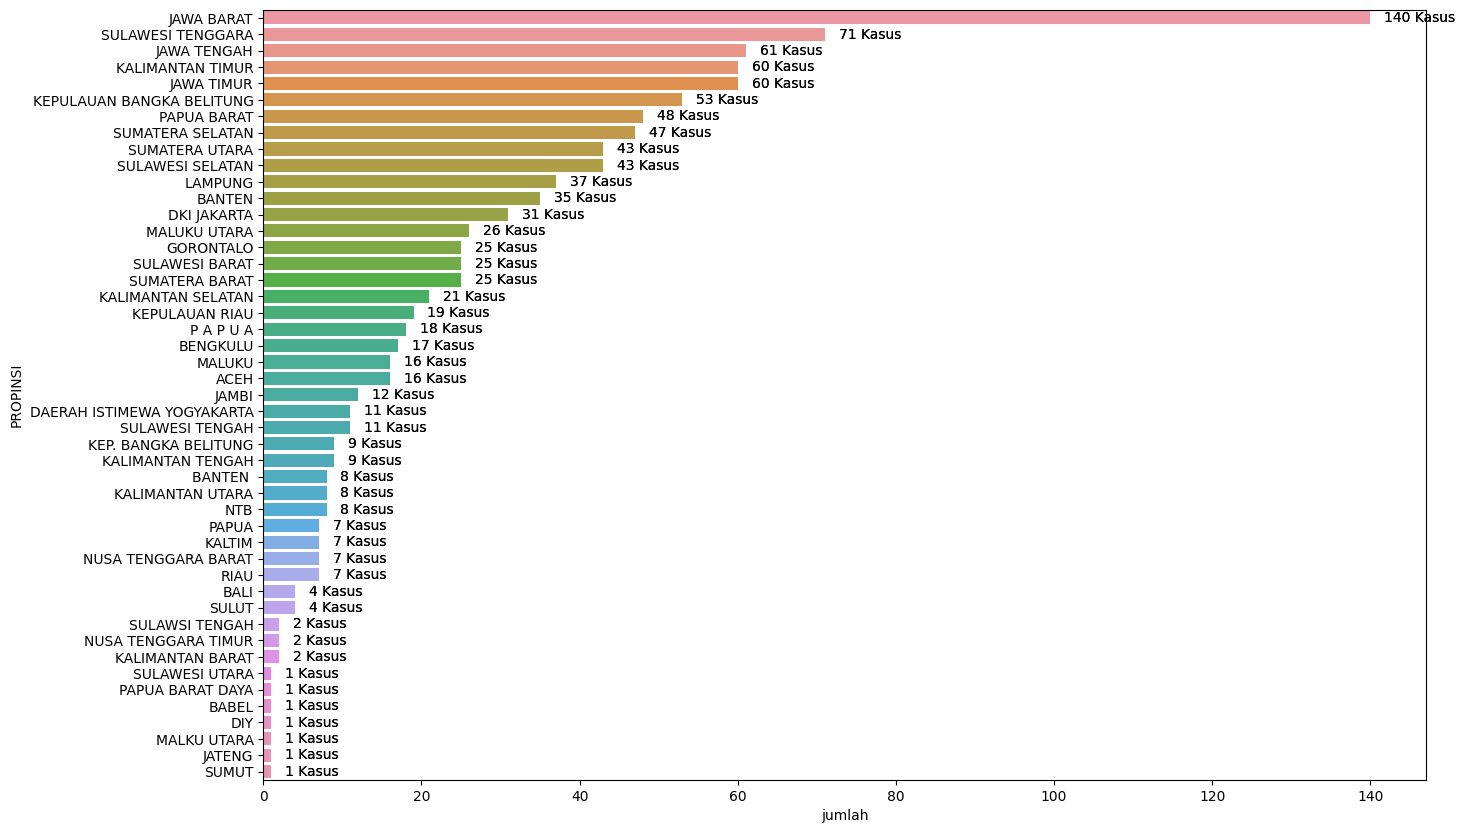

In [17]:
plt.figure(figsize=(15,10))
sns.barplot(data=region_count, y='PROPINSI', x='jumlah')
ax = sns.barplot(data= region_count,y='PROPINSI', x='jumlah')
for p in ax.patches:
    ax.annotate("%.0f Kasus" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(10, 0), textcoords='offset points', ha="left", va="center", color = 'black')


#### PPATK Berdasarkan Gender

In [18]:
gender = df['JENIS_KELAMIN'].value_counts().reset_index().rename(columns={'count':'jumlah'})
gender

,JENIS_KELAMIN,jumlah
0,M,599
1,F,463


[Text(0, 0, '599 (56%)'), Text(0, 0, '463 (44%)')]

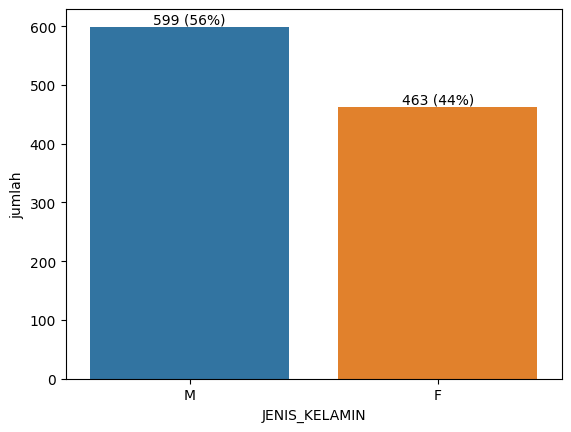

In [19]:
ax = sns.barplot(data= gender, x='JENIS_KELAMIN', y='jumlah')
abs_values = df['JENIS_KELAMIN'].value_counts(ascending=False)
rel_values = df['JENIS_KELAMIN'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls) #puts the labels on the bars
